# here I try plotting the top 1000 variable genes

In [10]:
#here I try plotting the top 1000 variable genes, this is from the entire dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

homedir = "/Users/zoliq/ownCloud/"
#homedir = "/Volumes/zoliq data/ownCloud/"
wd = homedir + "Jankoviny/Tick_transcriptome/klastrovani"
os.chdir(wd)

array = {}
indices = ['egg', 'larvae', 'fednymph', 'female', 'fedfemale']

print("loading data...")
with open("kliste_hierch_kmeans.gct") as f: #"trans.sample.gene-count_sorted.matrix.TMM.EXPR.txt" for the entire set
    c = 0
    for l in f:
        if c == 2:
            c += 1
            allcolumns = l.strip().split("\t")[1:]
            allcolumns = [x.replace(".RSEM","") for x in allcolumns]
            print("identified columns:")
            print(allcolumns)
        elif c < 3:
            c += 1
            print("ignored:" + l.strip())
        else:
            data = l.strip().split("\t")
            array[data[0]] = [float(x) for x in data[1:]]
print("reading morpheus infile finished")

print("computing variance for all contigs...")
df = pd.DataFrame(array, index=allcolumns, dtype=np.float64)

X = df.T
Xsub = X[indices]
variance = np.var(Xsub, axis=1) 
sortedvar = variance.sort_values(ascending=0, inplace=False)
topthousand = sortedvar.head(1000)

print("filtering subarray of contigs with highest variance")
x = [1, 2, 3, 4, 5]
subarray = {k:array[k][-5:] for k in array.keys() if k in list(topthousand.index)}
y = pd.DataFrame(subarray, index=indices, dtype=np.float64)
#print(y)

print("filtering contigs with highest variance finished")
print("CONTINUE TO WRITE OUTPUT FILES")

loading data...
ignored:#1.3
ignored:26744	5	6	0
identified columns:
['dendrogram_28', 'k_means_28', 'k_means_25', 'k_means_30', 'k_means_20', 'k_means_35', 'egg', 'larvae', 'fednymph', 'female', 'fedfemale']
reading morpheus infile finished
computing variance for all contigs...
filtering subarray of contigs with highest variance
filtering contigs with highest variance finished


plotting data


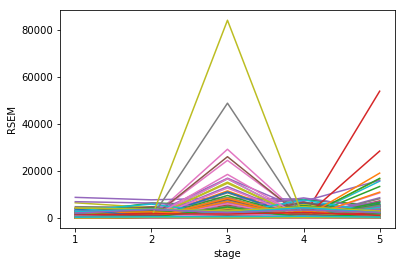

In [19]:
print("writing most variable contigs to table")
with open("top1000.tsv","w") as out:
    out.write("contig\t{}\n".format("\t".join(indices)))
    for seq in list(topthousand.index):
        #print(seq, topthousand[seq]) #and this is how you extract the respective values
        data = [str(x).replace(".",",") for x in array[seq][-5:]] #index important to extract only the stage RSEMs
        data = "\t".join(data)
        out.write("{}\t{}\n".format(seq, data))

print("plotting data")
labels = indices
plt.style.context('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel="stage", ylabel="RSEM")
ax.set_xticks(x)
fig.savefig("variances.png")
plt.show()

# this is performance analysis of the clustered filtered contigs

In [144]:
import numpy as np
import pandas as pd
import os

homedir = "/Users/zoliq/ownCloud/"
#homedir = "/Volumes/zoliq data/ownCloud/"
wd = homedir + "Jankoviny/Tick_transcriptome/klastrovani"
os.chdir(wd)

array = {}

with open("kliste_hierch99_kmean20-200.gct") as f:
    c = 0
    for l in f:
        if c == 2:
            c += 1
            allcolumns = l.strip().split("\t")[1:]
            allcolumns = [x.replace(".RSEM","") for x in allcolumns]
            print("identified columns:")
            print(allcolumns)
        elif c < 3:
            c += 1
            print("ignored:" + l.strip())
        else:
            data = l.strip().split("\t")
            array[data[0]] = [float(x) for x in data[1:]]
print("reading morpheus infile finished")

ignored:#1.3
ignored:26744	5	10	0
identified columns:
['dendrogram_99', 'k_means_28', 'k_means_25', 'k_means_30', 'k_means_20', 'k_means_35', 'k_means_100', 'k_means_75', 'k_means_150', 'k_means_200', 'egg', 'larvae', 'fednymph', 'female', 'fedfemale']
reading morpheus infile finished


In [145]:
df = pd.DataFrame(array, index=allcolumns, dtype=np.float64)
X = df.T
#indices = ['dendrogram_28', 'k_means_28', 'k_means_25', 'k_means_30', 'k_means_20', 'k_means_35', 'egg', 'larvae', 'fednymph', 'female', 'fedfemale']
indices = ['egg', 'larvae', 'fednymph', 'female', 'fedfemale']
Xsub = X[indices] #or give a list of subsets to keep

In [146]:
print(X.loc[:,"egg":].head(10))
#print(df.T)
#print(X)

            egg  larvae  fednymph  female  fedfemale
c10016_g1  1.00    0.35      0.00    1.60       1.38
c10039_g1  2.83    0.30      0.29    0.00       0.78
c10097_g1  0.00    0.00      0.00    3.21       0.00
c10119_g1  0.73    0.20      1.11    0.44       0.75
c10161_g1  0.09    0.02      2.86    1.70       2.80
c10203_g1  0.00    3.48      0.00    0.00       0.00
c1021_g1   0.88    0.00      0.43    0.00       0.00
c10235_g1  0.00    2.03      0.00    0.00       0.53
c10265_g1  0.00    4.32      1.08    3.26       1.86
c10295_g1  0.95    1.00      0.00    0.00       0.67


In [15]:
# the following is for calculation of variances on the filtered set of contigs, 
# essentially the same as above

In [16]:
#variance = np.var(X, axis=1) #0=x-axis, 1=y-axis
variance = np.var(X.loc[:,"egg":], axis=1) #limits calculation to columns defined after the comma

In [21]:
sortedvar = variance.sort_values(ascending=0, inplace=False)
topthousand = sortedvar.head(1000)
list(topthousand.index)[:5] #this is how you extract indices from a np.series

['c81210_g1', 'c56425_g1', 'c80070_g2', 'c69505_g1', 'c79647_g1']

silhouette tests and stuff:

In [22]:
#this section is to calculate per-module sum-of-square/avg.silhouette

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#X = df.T
Xsub = X.loc[:,"egg":] #should be same as Xsub = X[indices]
print("available clustering data:")
treatments = sorted(allcolumns[:allcolumns.index("egg")])
print(treatments) #subset of clustering protocols used
#print(X.head(10)) #to check if everything is fine
for kmean in treatments:
    maxmodules = int(kmean.split("_")[-1])
    #n_modules.append(maxmodules)
    print(kmean, maxmodules)
    cluster_labels_morpheus = np.array(X[kmean], dtype=np.int32)
    silhouette_avg = silhouette_score(Xsub, cluster_labels_morpheus)
    print("The average silhouette score is:", silhouette_avg)

#it is weird why the silhouette scores are negative for these clustering sets
#i tried other evaluation methods but i ended up with elbow test, see next section

available clustering data:
['dendrogram_28', 'k_means_20', 'k_means_25', 'k_means_28', 'k_means_30', 'k_means_35']
dendrogram_28 28
The average silhouette score is: -0.6861755519584396
k_means_20 20
The average silhouette score is: -0.41383380866375186
k_means_25 25
The average silhouette score is: -0.4526002225155799
k_means_28 28
The average silhouette score is: -0.4841625564482477
k_means_30 30
The average silhouette score is: -0.5028867105021053
k_means_35 35
The average silhouette score is: -0.5027330649954106


In [24]:
# this is to do the same with in-built K-means

In [35]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

Xsub = X.loc[:,"egg":]
n_modules = []
for maxmodules in range(2,15):
    kmeans = KMeans(n_clusters=maxmodules, random_state=10)
    cluster_labels = kmeans.fit_predict(Xsub)
    #spectral clustering takes a lot of time and produces an error: Graph is not fully connected!
    #spectral = SpectralClustering(n_clusters=maxmodules, random_state=10)
    #cluster_labels = spectral.fit_predict(Xsub)
    print("Calculating fit, n_clusters: {}".format(maxmodules))
    silhouette_avg = silhouette_score(Xsub, cluster_labels)
    
    #print("The average silhouette score for {} modules is {}:".format(maxmodules, silhouette_avg))
    print(kmeans.cluster_centers_)


Calculating fit, n_clusters: 2
[[1.87538991e+01 2.18952026e+01 2.94602982e+01 5.76648816e+01
  5.56271482e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.87030000e+02]]
Calculating fit, n_clusters: 3
[[1.70916781e+01 2.00091078e+01 2.70518768e+01 3.72705969e+01
  3.53495552e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.87030000e+02]
 [8.06646667e+02 9.15904167e+02 1.17105208e+03 9.72455583e+03
  9.66720625e+03]]
Calculating fit, n_clusters: 4
[[1.70944804e+01 2.00120213e+01 2.70558924e+01 3.46321725e+01
  3.71317646e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.87030000e+02]
 [5.48800000e+01 5.05650000e+01 2.55330000e+02 7.22695000e+02
  4.12179900e+04]
 [8.02169583e+02 9.11977083e+02 1.15012583e+03 1.09178304e+04
  5.39070083e+03]]
Calculating fit, n_clusters: 5
[[1.29627795e+01 1.41911047e+01 1.91888626e+01 2.77474287e+01
  2.61491026e+01]
 [2.24100000e+01 2.53600000e+01 2.56950000e+01 6.65367150e+04
  4.8703000

In [7]:
maxmodules = 15
#this is for a single cluster analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
Xsub = X.loc[:,"egg":]
kmeans = KMeans(n_clusters=maxmodules, random_state=10)
cluster_labels = kmeans.fit_predict(Xsub)
#i would get the same using:
cluster_labels_morpheus = np.array(X.k_means_15, dtype=np.int32)
#silhouette_avg = silhouette_score(Xsub, cluster_labels_morpheus)
#print("The average silh score is:", silhouette_avg)

In [8]:
#this is memory-demanding but doable for 11000 contigs
silhouette_avg = silhouette_score(Xsub, cluster_labels_morpheus)
print("The average silh score is:", silhouette_avg)

The average silh score is: -0.4981674512978522


In [9]:
#compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(Xsub, cluster_labels_morpheus)

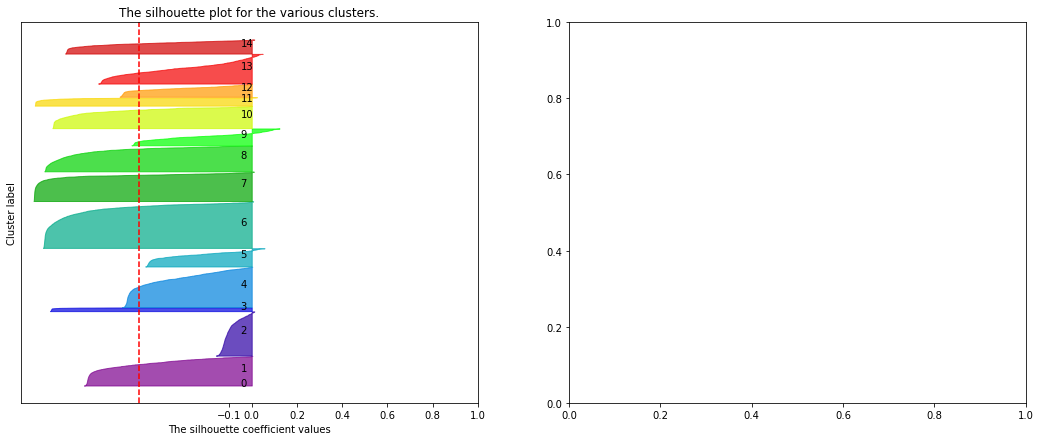

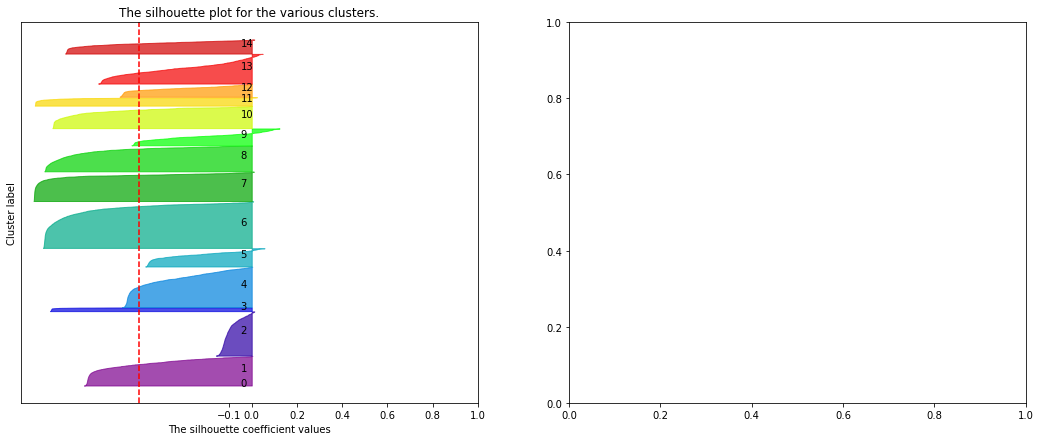

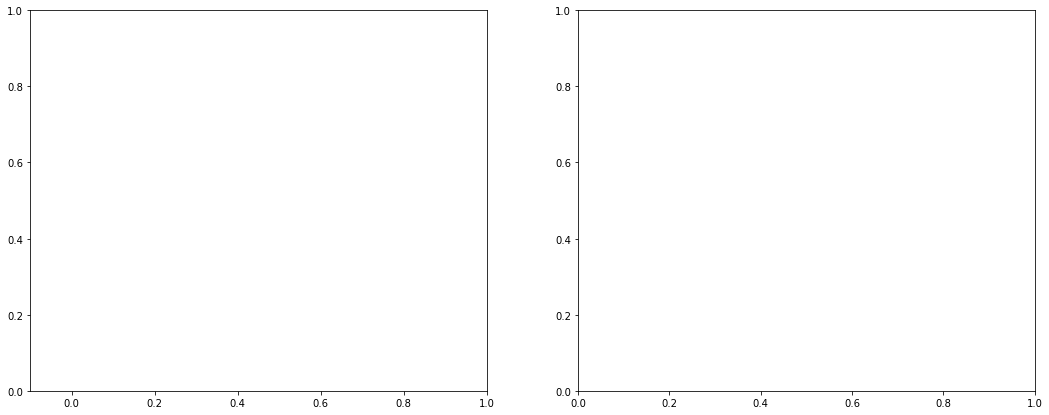

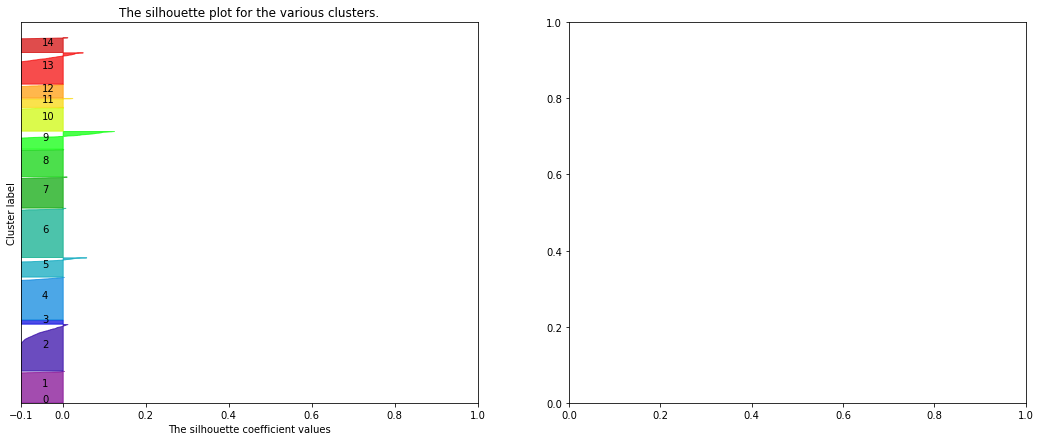

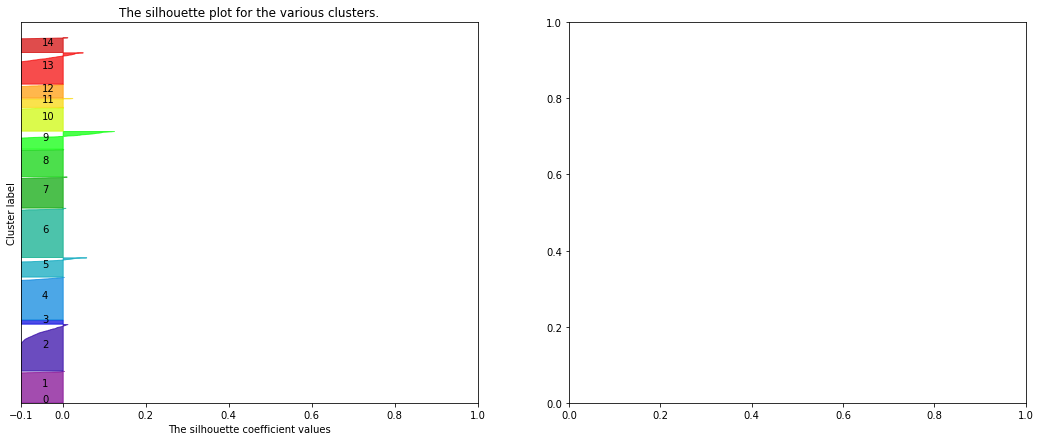

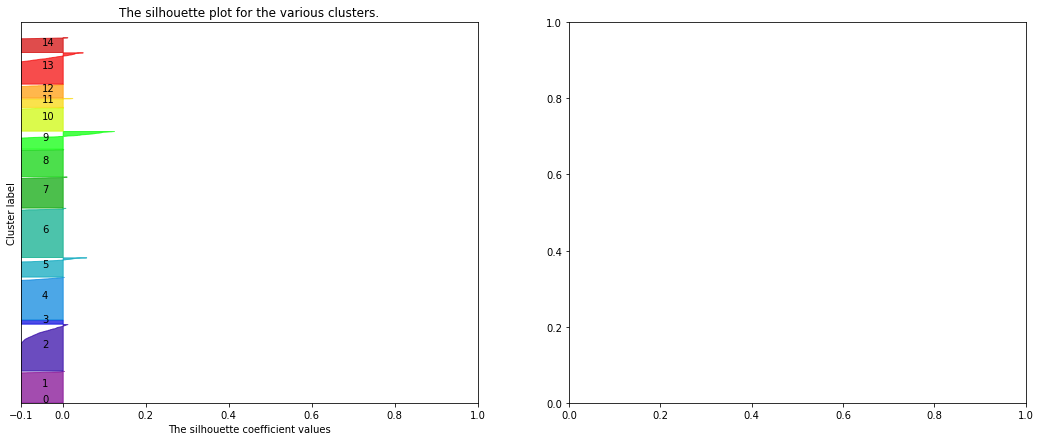

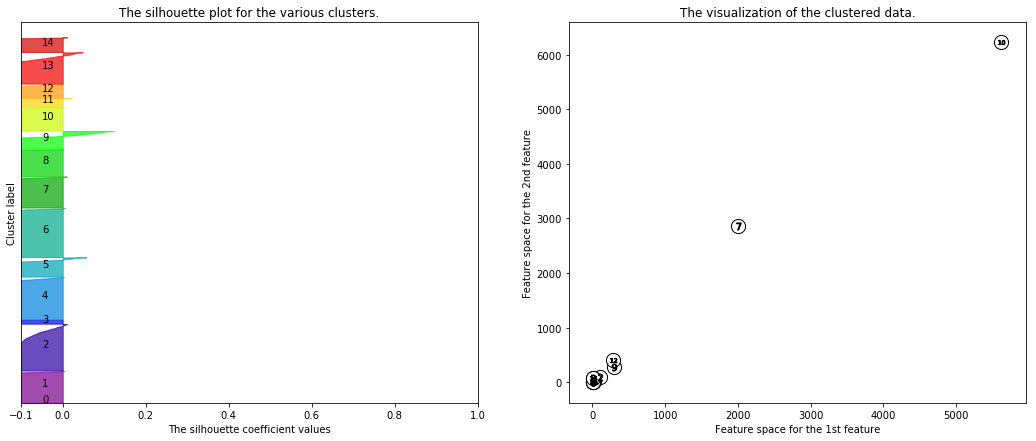

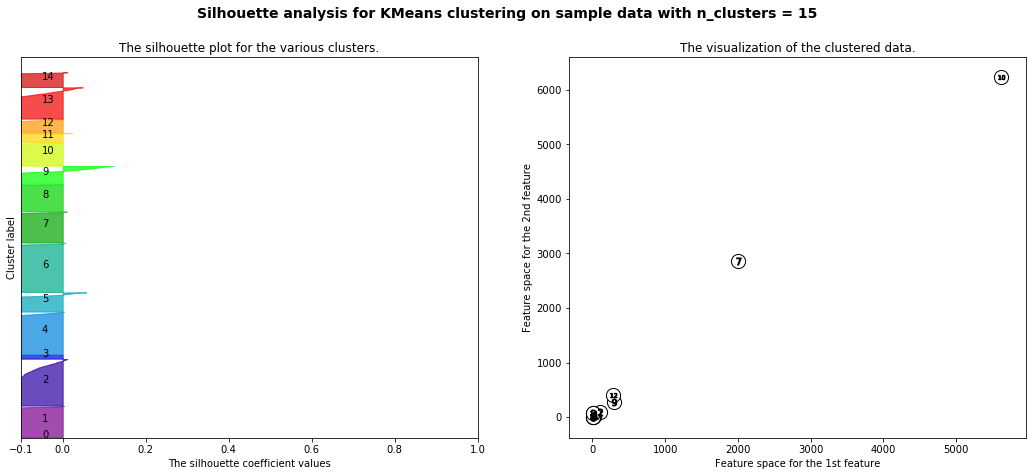

In [19]:
#this is to plot silhouette distributions for each module for n_clusters = 15
maxmodules = 15
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (maxmodules + 1) * 10])

y_lower = 10
for i in range(maxmodules):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels_morpheus == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / maxmodules)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / maxmodules)
#ax2.scatter(Xsub[:, 0], Xsub[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % maxmodules),
             fontsize=14, fontweight='bold')

plt.show()

# this section is to calculate per-module variance, centroid and plot average expression and STD across stages

In [147]:
#here i need to calculate the standardized expressions:
X['mean'] = X.loc[:,"egg":"fedfemale"].mean(axis=1)
stages = ['egg', 'larvae', 'fednymph', 'female', 'fedfemale']
for stage in stages:
    X[stage + "_n"] = np.log(0.1 + X.loc[:,stage]/X['mean']) #maybe standardize to egg stage
#print(X.head(10))
Xsub = X.loc[:,"egg_n":"fedfemale_n"] #note that the original RSEM data were "discarded"
print(Xsub.head(10))

              egg_n  larvae_n  fednymph_n  female_n  fedfemale_n
c10016_g1  0.226924 -0.684867   -2.302585  0.666585     0.526817
c10039_g1  1.243880 -0.782759   -0.809146 -2.302585     0.028171
c10097_g1 -2.302585 -2.302585   -2.302585  1.629241    -2.302585
c10119_g1  0.207039 -0.892580    0.597883 -0.247033     0.231898
c10161_g1 -1.831077 -2.176950    0.700284  0.213404     0.680145
c10203_g1 -2.302585  1.629241   -2.302585 -2.302585    -2.302585
c1021_g1   1.240916 -2.302585    0.554587 -2.302585    -2.302585
c10235_g1 -2.302585  1.402375   -2.302585 -2.302585     0.126770
c10265_g1 -2.302585  0.766970   -0.488888  0.500430    -0.016098
c10295_g1  0.648661  0.697337   -2.302585 -2.302585     0.321087


In [178]:
#calculate variance for standardized data
variance = np.var(X.loc[:,"egg":"fedfemale"], axis=1)
sortedvar = variance.sort_values(ascending=0, inplace=False)
topthousand = sortedvar.head(1000)

variance_n = np.var(X.loc[:,"egg_n":"fedfemale_n"], axis=1) #limits calculation to columns defined after the comma
sortedvar_n = variance_n.sort_values(ascending=0, inplace=False)
topthousand_n = sortedvar_n.head(1000)

#list(topthousand_n.index)[:5] #this is how you extract indices from a np.series
print("filtering subarray of contigs with highest variance")
x = [1, 2, 3, 4, 5]
subarray = {k:array[k][-5:] for k in array.keys() if k in list(topthousand.index)} 
y = pd.DataFrame(subarray, index=indices, dtype=np.float64)
#and also normalized:
topstuff = [k for k in list(Xsub.index) if k in list(topthousand.index)]
topvariablenorm = Xsub.filter(items=topstuff, axis=0) #specify axis to filter indexes not values
y_n = pd.DataFrame(topvariablenorm.T, dtype=np.float64)
print(y)
print(y_n)

print("filtering contigs with highest variance finished")
print("CONTINUE TO WRITE OUTPUT FILES")

filtering subarray of contigs with highest variance
           c10097_g1  c1021_g1  c10395_g1  c10398_g1  c10577_g2  c10737_g1  \
egg             0.00      0.88       0.00       0.00       0.00       0.00   
larvae          0.00      0.00       0.00       0.00       1.08       1.13   
fednymph        0.00      0.43       0.00       0.00       0.00       0.00   
female          3.21      0.00       5.22       0.00       1.83       0.00   
fedfemale       0.00      0.00       0.00       1.76       0.00       1.22   

           c10737_g2  c1125_g1  c11297_g1  c11771_g1    ...     c86639_g1  \
egg             0.00      1.62       1.73       0.00    ...           0.0   
larvae          2.26      0.00       0.00       0.00    ...           0.0   
fednymph        0.00      0.00       0.00       0.00    ...           0.0   
female          0.00      0.72       0.00       1.19    ...           0.0   
fedfemale       1.18      0.00       0.95       0.00    ...           0.4   

           c8664

writing most variable contigs to table
plotting data


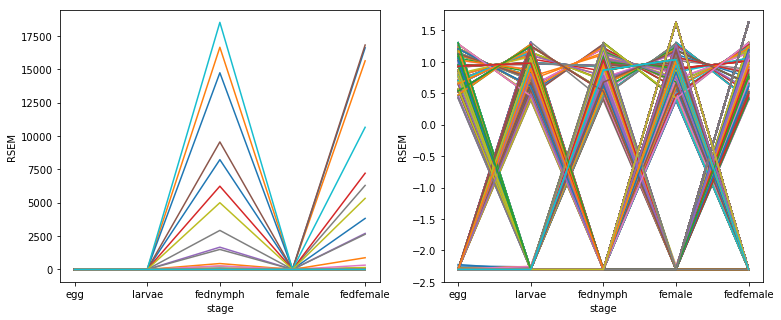

In [185]:
print("writing most variable contigs to table")
with open("top1000_norm.tsv","w") as out:
    out.write("contig\t{}\n".format("\t".join(indices)))
    for seq in list(topthousand.index):
        #print(seq, topthousand[seq]) #and this is how you extract the respective values
        data = [str(x).replace(".",",") for x in array[seq][-5:]] #index important to extract only the stage RSEMs
        data = "\t".join(data)
        out.write("{}\t{}\n".format(seq, data))

print("plotting data")
labels = indices
plt.style.context('Solarize_Light2')
fig, (ax1,ax2) = plt.subplots(1,2, sharey=False, figsize=(12.6,5))
ax1.plot(x, y)
ax1.set(xlabel="stage", ylabel="RSEM")
ax1.set_xticks(x)
ax1.set_xticklabels(stages)
#for tick in ax1.get_xticklabels():
#    tick.set_rotation(55)

ax2.plot(x, y_n)
ax2.set(xlabel="stage", ylabel="RSEM")
ax2.set_xticks(x)
ax2.set_xticklabels(stages)
#for tick in ax2.get_xticklabels():
#    tick.set_rotation(55)

fig.savefig("variances.png")
plt.show()

Found data for clustering methods:
['dendrogram_99', 'k_means_28', 'k_means_25', 'k_means_30', 'k_means_20', 'k_means_35', 'k_means_100', 'k_means_75', 'k_means_150', 'k_means_200']
Analyzing data for: ...dendrogram_99
1133.8605319088113


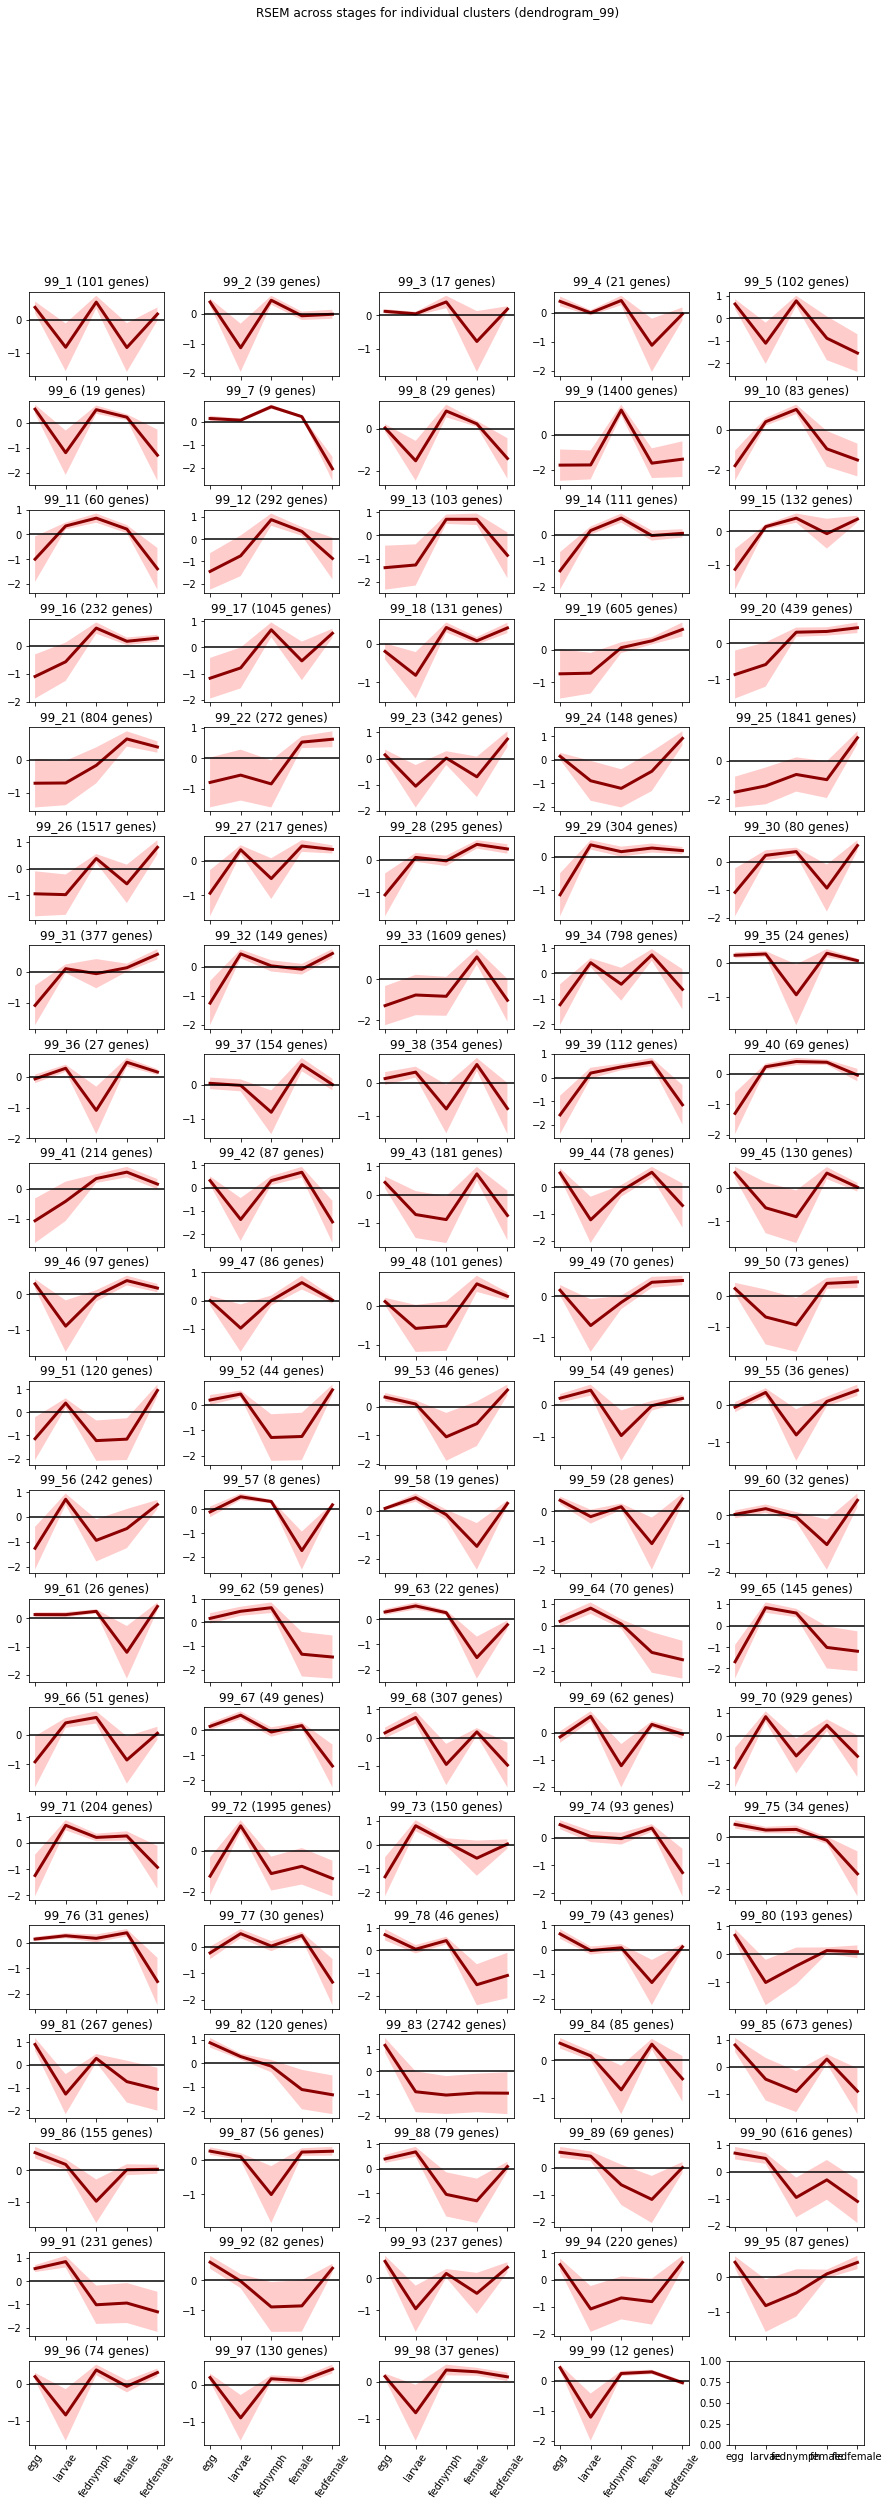

Success!
Analyzing data for: ...k_means_28
2418.6019357145024


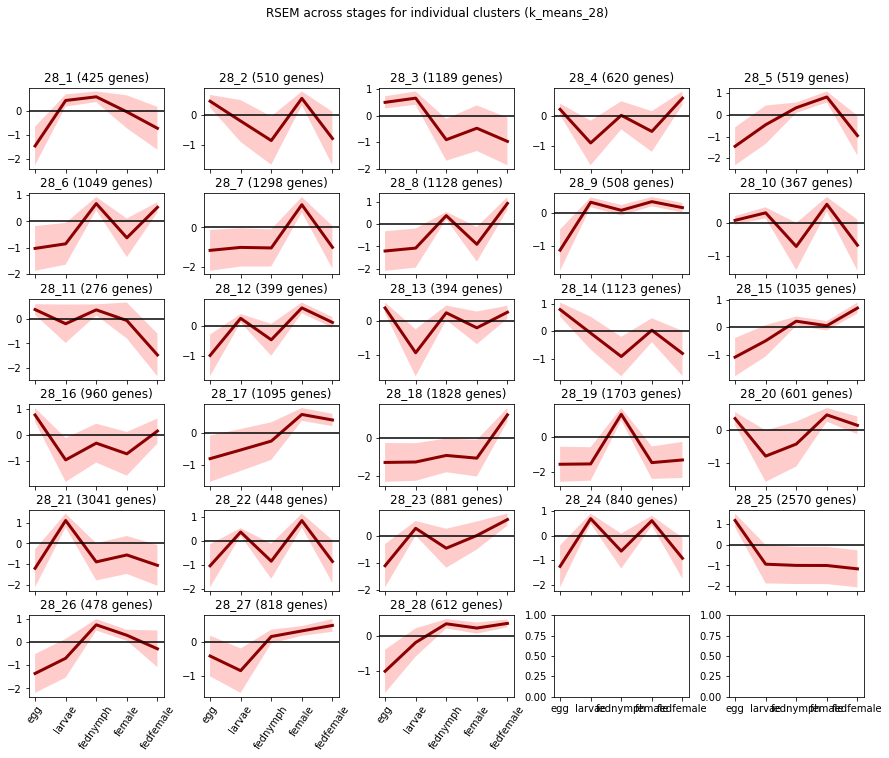

Success!
Analyzing data for: ...k_means_25
2588.658209839947


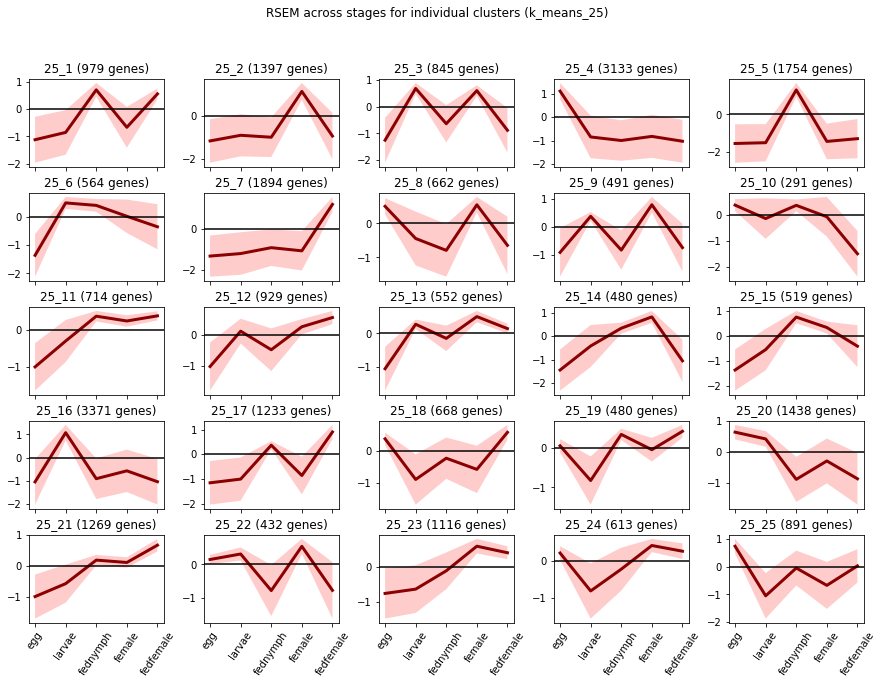

Success!
Analyzing data for: ...k_means_30
2353.704591172422


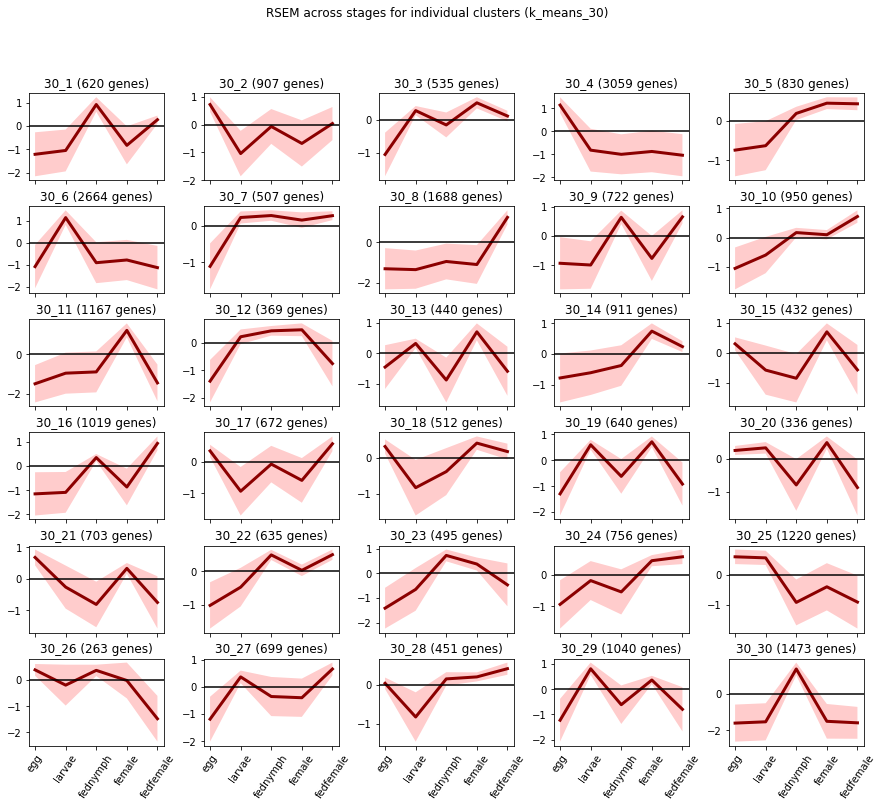

Success!
Analyzing data for: ...k_means_20
2976.3413826247906


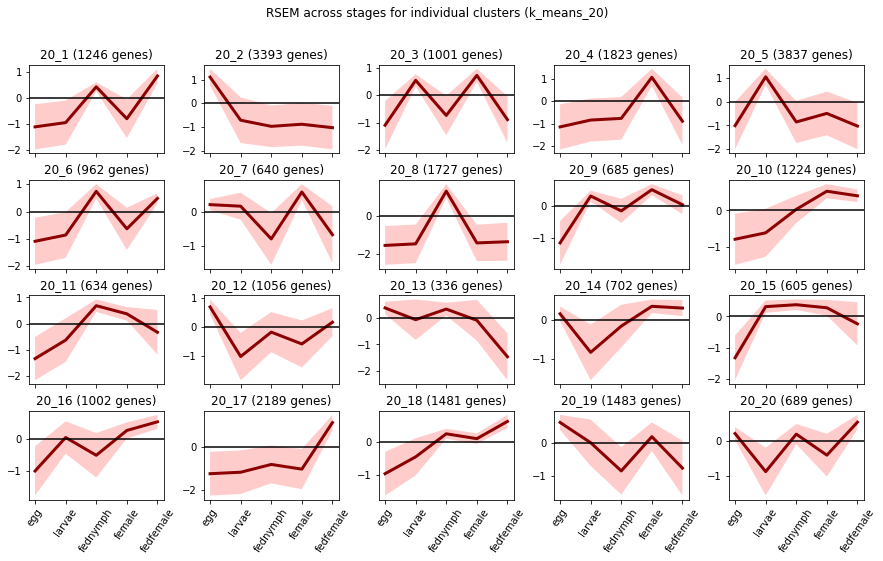

Success!
Analyzing data for: ...k_means_35
2170.4951433420347


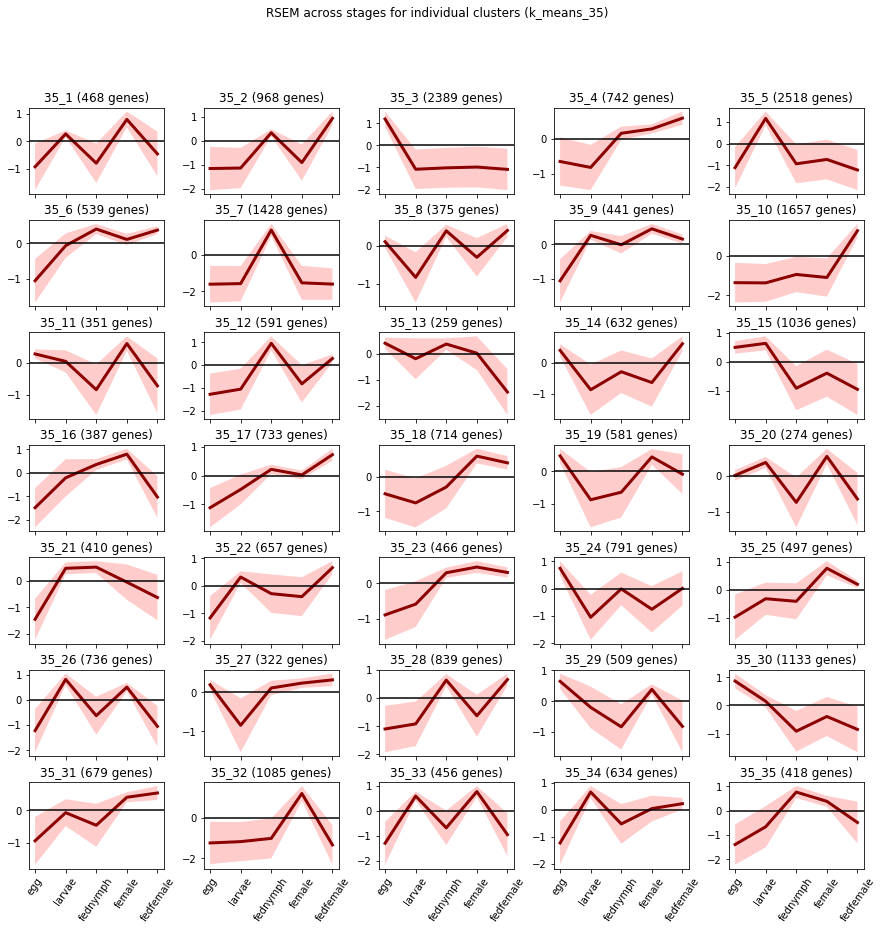

Success!
Analyzing data for: ...k_means_100
989.7254682923156


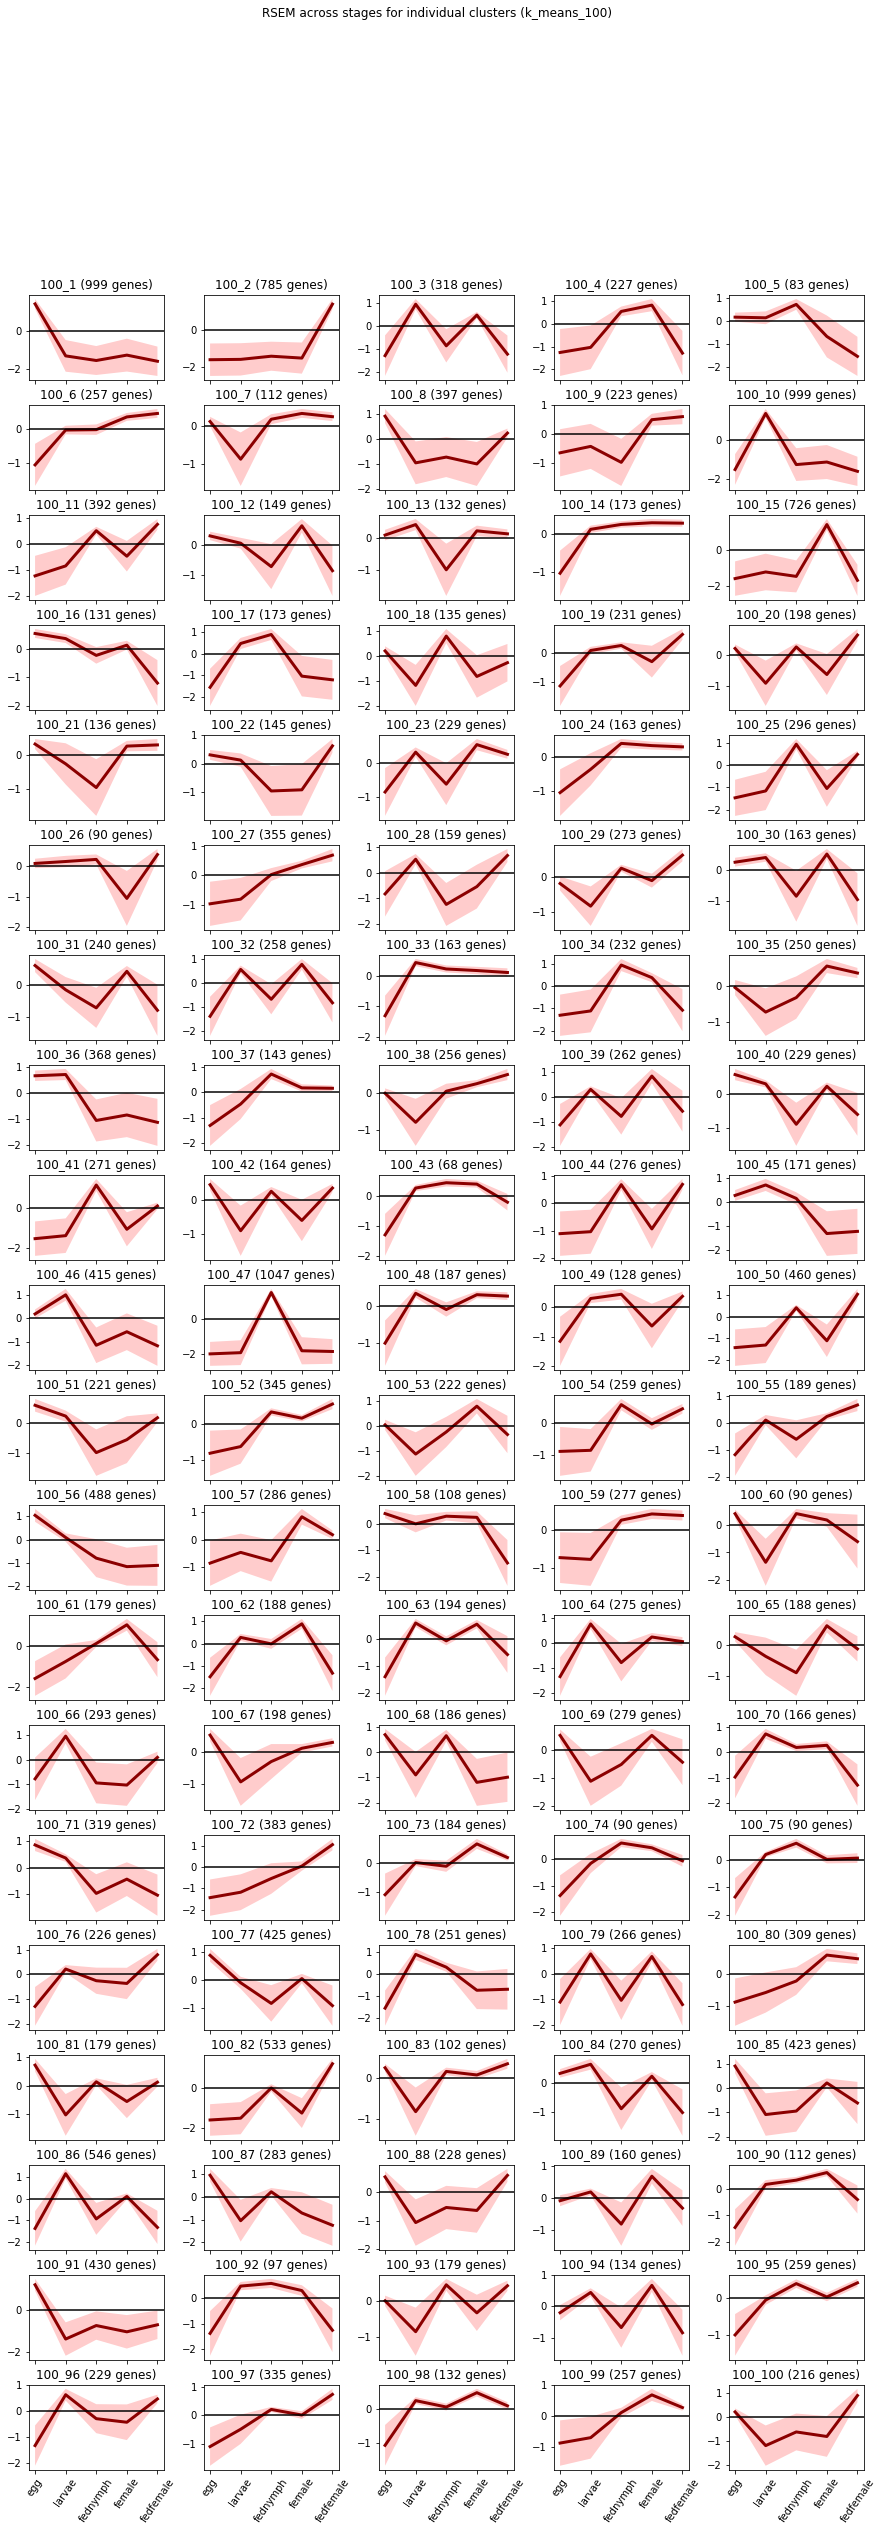

Success!
Analyzing data for: ...k_means_75
1224.0198525784501


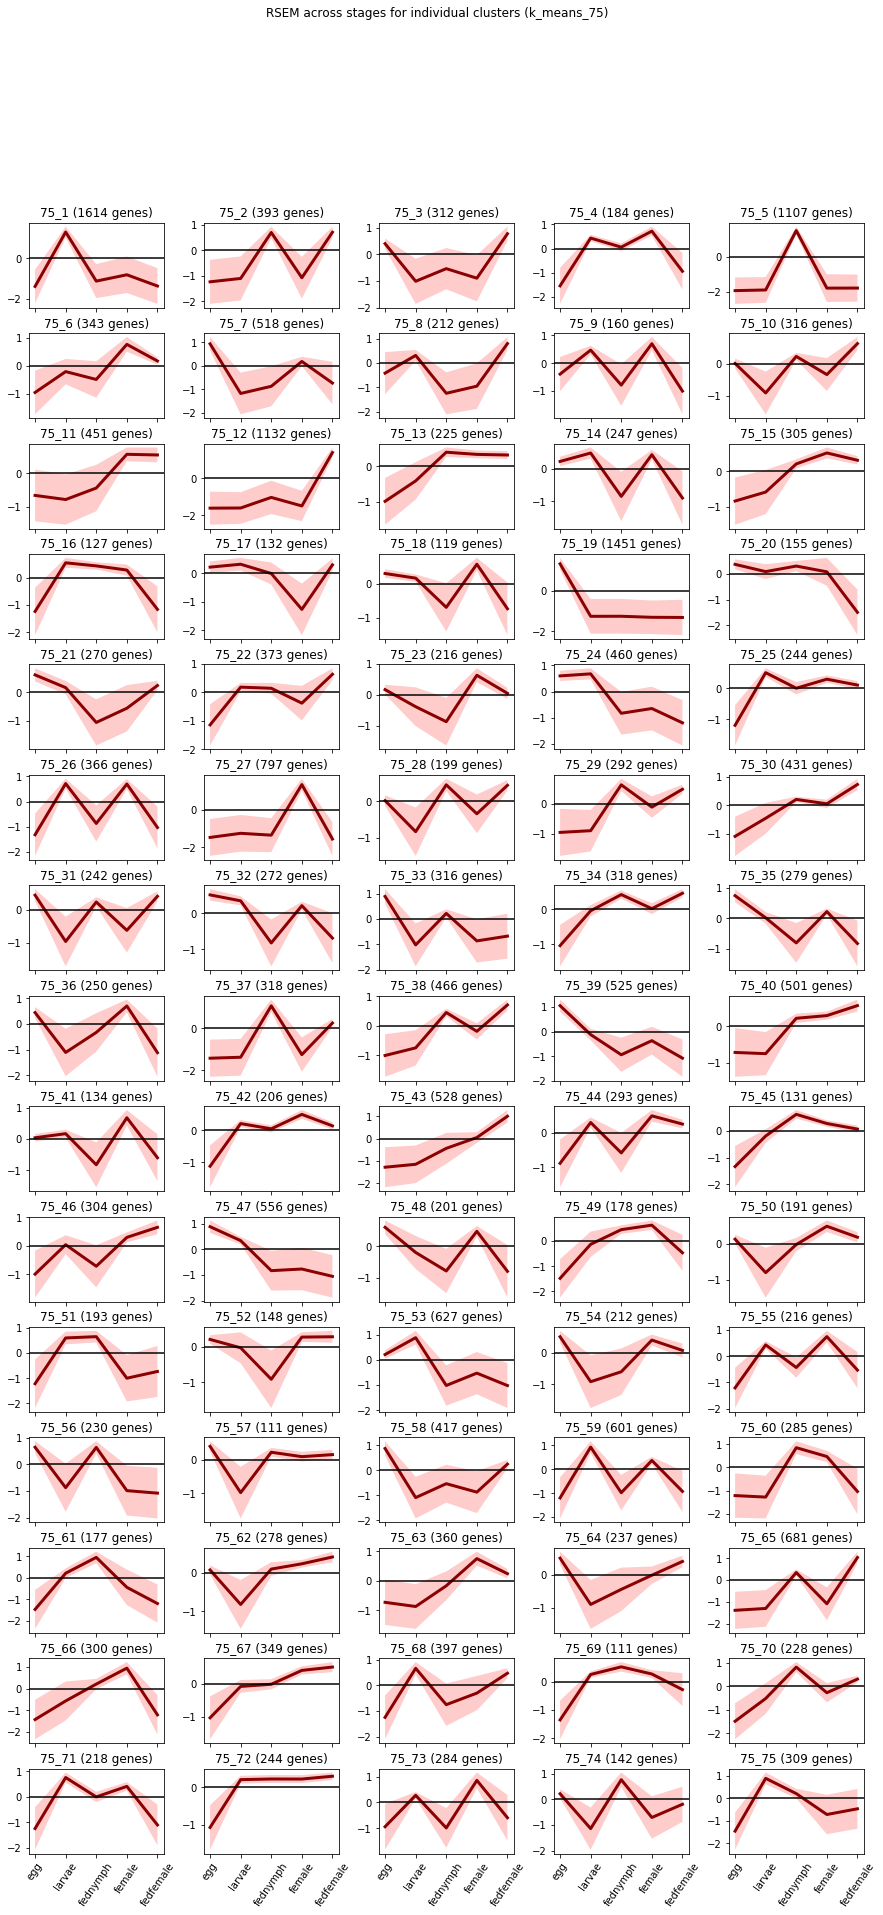

Success!
Analyzing data for: ...k_means_150
749.2262934149131


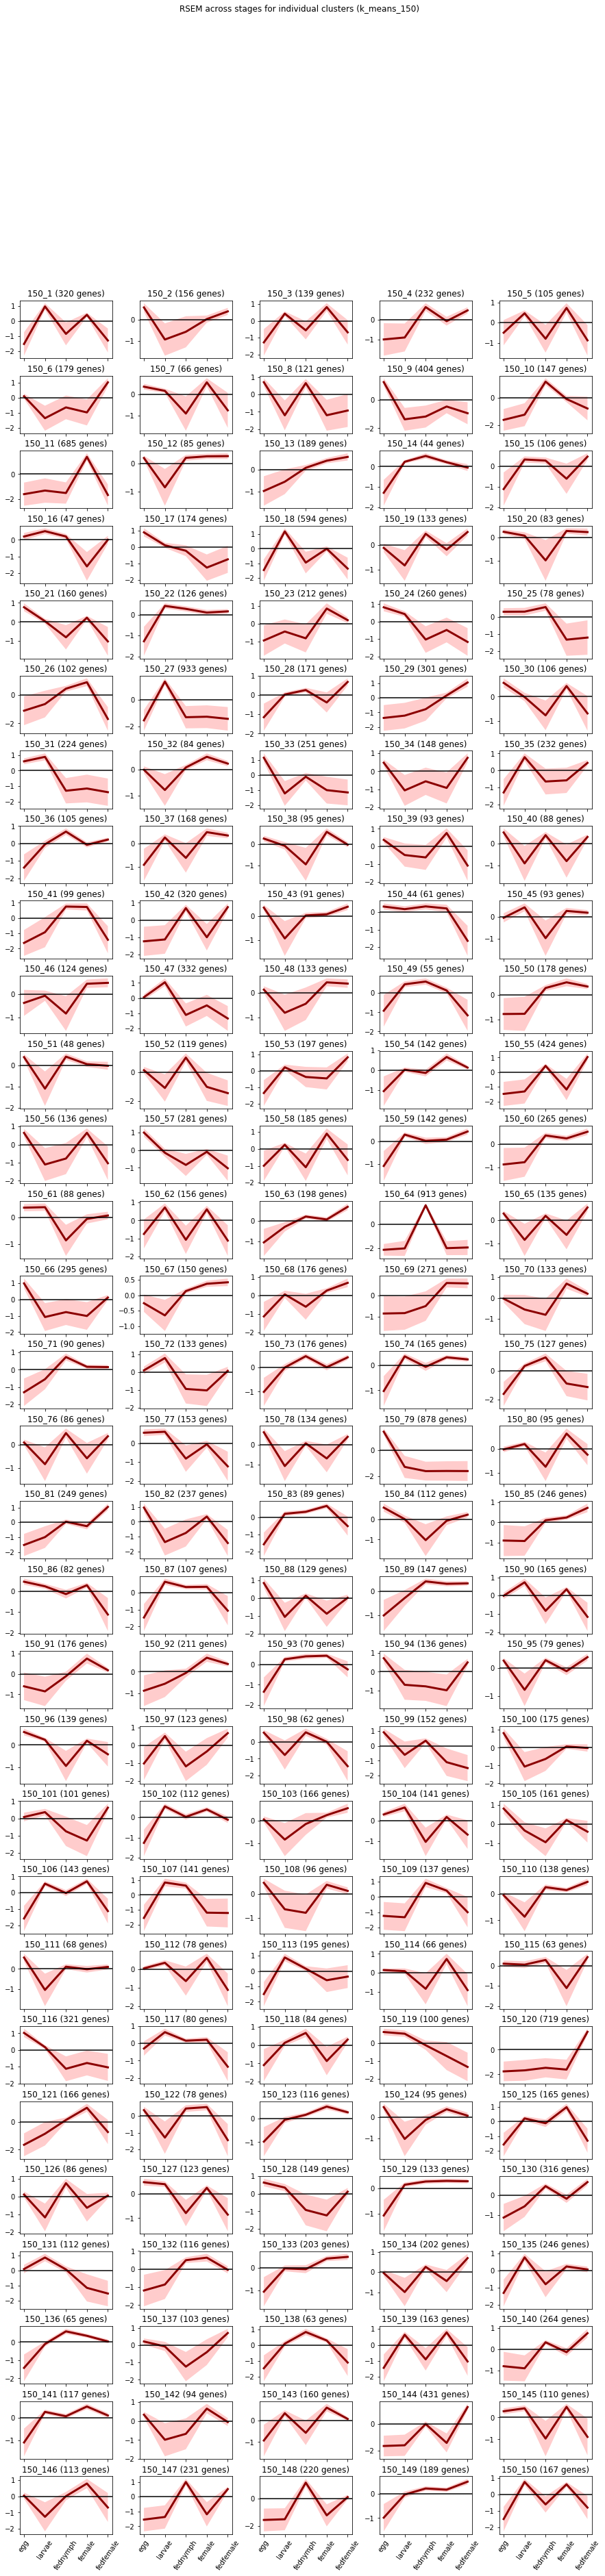

Success!
Analyzing data for: ...k_means_200
644.8566404388246


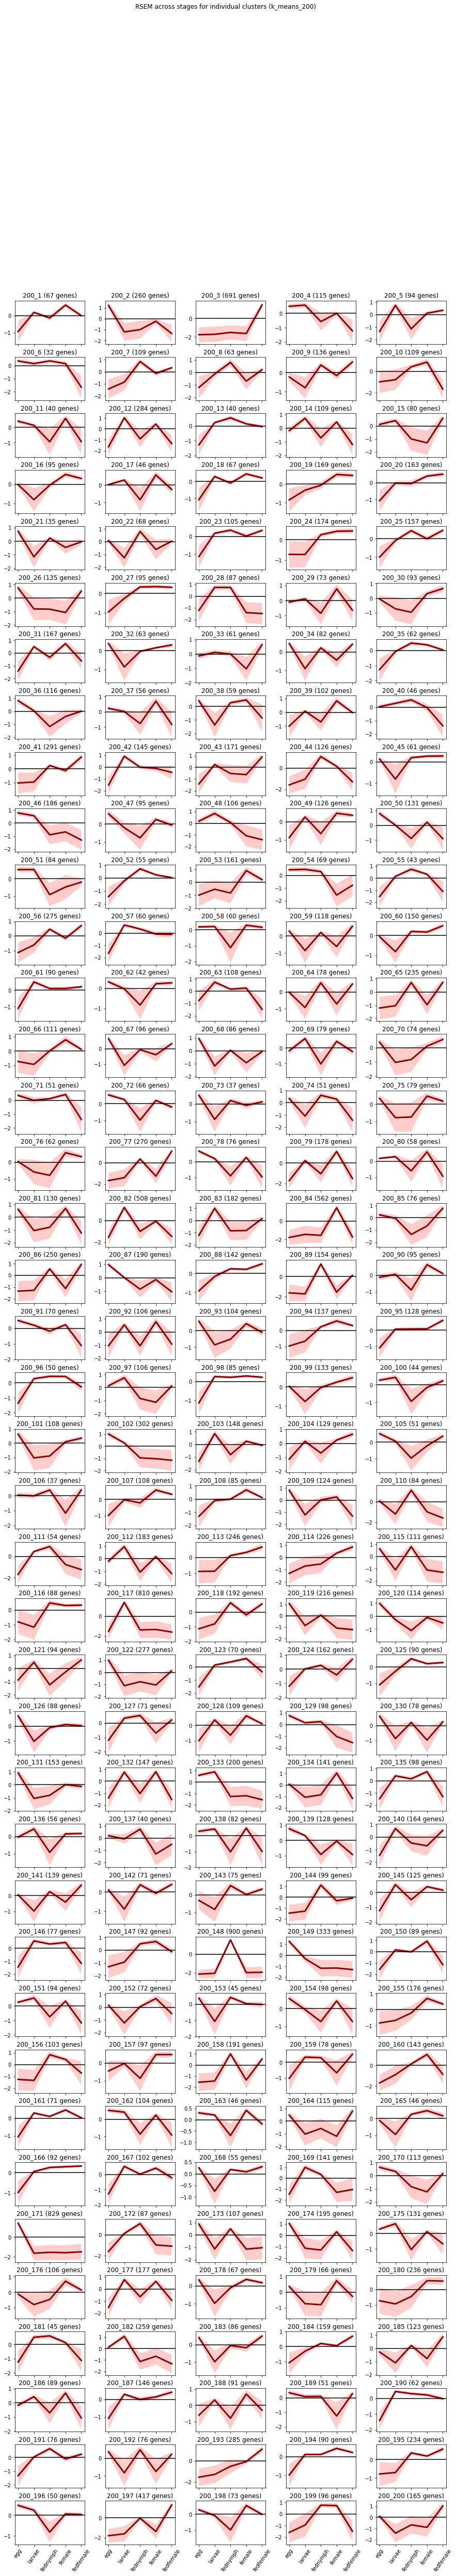

Success!
Closing report file, now to plot graph...


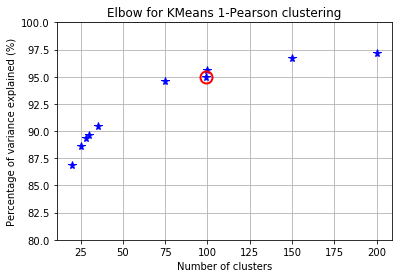

Analysis done!


In [186]:
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import cdist,pdist
from scipy.stats import pearsonr
from math import ceil, isnan

Xsub = X.loc[:,"egg_n":"fedfemale_n"]
stages = ['egg', 'larvae', 'fednymph', 'female', 'fedfemale']
standardized = ['egg_n', 'larvae_n', 'fednymph_n', 'female_n', 'fedfemale_n']
treatments = allcolumns[:allcolumns.index("egg")]
print("Found data for clustering methods:")
print(treatments)
stagesn = [1, 2, 3, 4, 5]
centroids = {}
reportfile = open("clustering_report_norm_1-Pearson.txt", "w")
plotx = []
ploty = []
plot_dict = {} #this would allow sorting the treatments, 
                #but would also lose the value for dendrogram_28 - same key as kmean_28
for kmean in treatments[:]:   
    cluststats = {}
    maxmodules = int(kmean.split("_")[-1])
    centroids[kmean] = ([], "var")
    print("Analyzing data for: " + kmean)
    reportfile.write("{} with max modules {}\n".format(kmean, maxmodules))
    cluster_labels_morpheus = np.array(X[kmean], dtype=np.int32)
    for cluster in range(1,maxmodules + 1):
        #determine which contigs belong to this cluster
        contigs = Xsub[X[kmean] == cluster]
        #variance = np.var(Xsub.loc[:,:], axis=0) #limits calculation to columns defined after the comma
        #print(cluster, len(contigs)) #make sure all the clusters are analyzed
        cluststats["{}_{}".format(maxmodules, cluster)] = {"mean": contigs.mean(), 
                                                           "std": contigs.std(), 
                                                           "count": contigs.count()["egg_n"]}
        #print(contigs.describe()) #only for control, or to find out what other stats are readily available
        # calculate within-cluster variance
        centroids[kmean][0].append(list(contigs.mean()))
    #allcent = Xsub.mean()
    #print(allcent)
    cent = np.array(centroids[kmean][0])
    
    #calculate minimum distance of each contig to any centroid:
    """
    D_k = [cdist(Xsub, c, 'euclidean') for c in [cent]]
    #cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    reportfile.write("distvalues: {}, ".format(len(dist[0])))
    dist = [d[~np.isnan(d)] for d in dist] # ~ >> logical not
    reportfile.write("distvalues without NaN: {}\n".format(len(dist[0])))
    #some distance stats:
    tot_withinss = [sum(d**2) for d in dist]    # Total within-cluster sum of squares
    reportfile.write("total within-cluster distance sqsum:\t{}\n".format(tot_withinss[0]))  
    totss = sum(pdist(Xsub.dropna(how='any'))**2)/Xsub.shape[0]  # The total sum of squares
    reportfile.write("total distance sqsum:\t{}\n".format(totss))
    betweenss = totss - tot_withinss           # The between-cluster sum of squares
    reportfile.write("total explained distance sqsum:\t{}({:.2f}%)\n\n"\
                     .format(betweenss[0], 100 * betweenss[0]/totss))
    """
    
    #1-Pearson correlation CALCULATED WITHIN-GROUP/GLOBALLY
    tot_withinps = 0
    tot_ps = 22741.720695223998 #calculated previously from 1-Pearson distance from average centroid
    Xsub_noNaN = Xsub.dropna(how='any')
    for x in range(1, Xsub_noNaN.shape[0] + 1):
        point = np.array(Xsub_noNaN[x-1:x])[0] #no more runtime error?
        #if x > Xsub_noNaN.shape[0] - 1:
        #    print(x, point)        
        value = np.min([1 - pearsonr(point, c)[0] for c in cent])
        #avgvalue = 1 - pearsonr(point,allcent)[0]
        if isinstance(value, float):
            tot_withinps += value
            #tot_ps += avgvalue
    print(tot_withinps)
    plotx.append(maxmodules)
    ploty.append((tot_ps - tot_withinps)/tot_ps*100)
    #print(tot_ps)
    reportfile.write("total within-cluster 1-pearson:\t{}\t{:.2f}% of total explained\n\n"\
                     .format(tot_withinps, (tot_ps - tot_withinps)/tot_ps*100))
    
    #make an array of plots
    
    fig, axs = plt.subplots(nrows=ceil(maxmodules/5), ncols=5, figsize=(12.6, 0.4*maxmodules), sharex=True,
                            subplot_kw={'xticks': stagesn}) #'yticks': [] to leave empty ax
    fig.subplots_adjust(left=0.05, right=0.97, hspace=0.3, wspace=0.3)
    fig.suptitle('RSEM across stages for individual clusters ({})'.format(kmean))
    
    for i, data in enumerate(cluststats.keys()):
        y = cluststats[data]["mean"]
        err = cluststats[data]["std"]
        axs[i//5,i%5].plot(stagesn, cluststats[data]["mean"], color="darkred", linewidth=3)
        axs[i//5,i%5].axhline(y=0, color='k')
        #axs[i//5,i%5].xticks(np.arange(5), stages)
        suptitle = "{} ({} genes)".format(data, cluststats[data]["count"])
        axs[i//5,i%5].set_title(suptitle)
        axs[i//5,i%5].fill_between(stagesn, y-err, y+err, facecolor="red", alpha=0.2)
        #some other parameters for the shading: edgecolor=, antialiased=True 
        #axs[i//5,i%5].errorbar(stagesn, cluststats[data]["mean"], yerr=cluststats[data]["std"], \
        #                       linewidth=0, elinewidth=1)
        axs[i//5,i%5].set_xticklabels(stages)
        for tick in axs[i//5,i%5].get_xticklabels():
            tick.set_rotation(55)
 
    plt.savefig(kmean + "_shade_plots.pdf")                                      
    plt.show()
    print("Success!")
    
#comment
print("Closing report file, now to plot graph...")
reportfile.close()

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(plotx, ploty, 'b*-', linewidth=0, markersize=8)
ax.plot(plotx[0], ploty[0], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((80,100)) # 80-100%
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans 1-Pearson clustering')

#plt.savefig("k_means_dist.pdf") 
plt.show()
print("Analysis done!")

just a cute random polar plot:

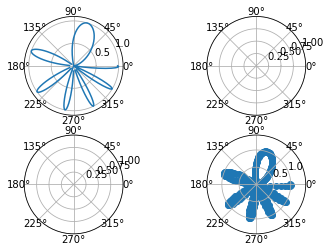

In [126]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)
plt.show()

In [71]:
#calculation of optimal cluster number by the elbow method:
#https://stackoverflow.com/questions/6645895/calculating-the-percentage-of-variance-measure-for-k-means?lq=1#
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist,pdist
import matplotlib.pyplot as plt

# load the iris dataset
#fName = 'C:\\Python27\\Lib\\site-packages\\scipy\\spatial\\tests\\data\\iris.txt'
#fp = open(fName)
#X = np.loadtxt(fp)
#fp.close()
XsubNORM = X.loc[:,"egg_n":"fedfemale_n"]
XsubKM = XsubNORM.dropna(how='any')

##### cluster data into K=1..40 clusters #####
maxK = 40
K = range(1,maxK + 1, 5)

# scipy.cluster.vq.kmeans
KM = [kmeans(XsubKM,k) for k in K]
#print(KM) #reveals that KM is a tuple of centroids for each subgroup and total variance 
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.cluster.vq.vq
#Z = [vq(X,cent) for cent in centroids]
#avgWithinSS = [sum(dist)/X.shape[0] for (cIdx,dist) in Z]

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(XsubKM, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
#avgWithinSS = [sum(d)/XsubKM.shape[0] for d in dist]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
print(tot_withinss)
totss = sum(pdist(XsubKM)**2)/XsubKM.shape[0]       # The total sum of squares
print(totss)
betweenss = totss - tot_withinss          # The between-cluster sum of squares



[array([2.48701204, 2.81981493, 4.27519653, ..., 4.54481165, 2.1468083 ,
       3.95089516])]
[151249.9903200069, 66364.3421679599, 46510.50898299962, 37846.020346275254, 31909.313440912567, 28010.9839937852, 24724.208803846977, 22319.878076890174]
151249.99032111024


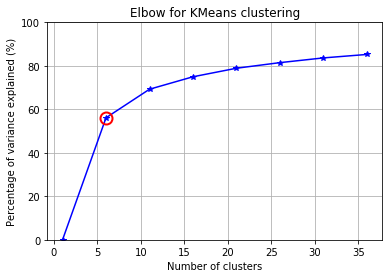

In [74]:
from matplotlib import cm
##### plots #####
kIdx = 1        # mark down K=29
clr = cm.spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, betweenss/totss*100, 'b*-')
ax.plot(K[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

plt.show()

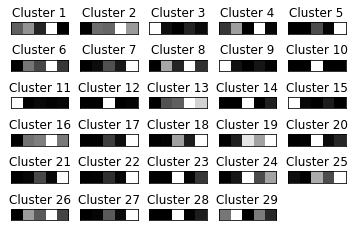

In [49]:
# show centroids for K=20 clusters
plt.figure()
for i in range(kIdx+1):
    img = centroids[kIdx][i].reshape(1,5)
    ax = plt.subplot(6,5,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title( 'Cluster {}'.format(i + 1))
plt.savefig("clusters_reshaped.png")
plt.show()